Para importar el dataset corran en terminal
_pip install uimclrepo_


En el gitignore pongan los archivos de sus virtual environments uwu pofavo

In [72]:
# pip install ucimlrepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,  cross_val_predict, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [73]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
parkinsons_telemonitoring = fetch_ucirepo(id=189) 
  
# data (as pandas dataframes) 
X = parkinsons_telemonitoring.data.features 
y = parkinsons_telemonitoring.data.targets 
  
# metadata 
print(parkinsons_telemonitoring.metadata) 
  
# variable information 
print(parkinsons_telemonitoring.variables) 


{'uci_id': 189, 'name': 'Parkinsons Telemonitoring', 'repository_url': 'https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring', 'data_url': 'https://archive.ics.uci.edu/static/public/189/data.csv', 'abstract': "Oxford Parkinson's Disease Telemonitoring Dataset", 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 5875, 'num_features': 19, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['motor_UPDRS', 'total_UPDRS'], 'index_col': ['subject#'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5ZS3N', 'creators': ['Athanasios Tsanas', 'Max Little'], 'intro_paper': {'ID': 229, 'type': 'NATIVE', 'title': "Accurate Telemonitoring of Parkinson's Disease Progression by Noninvasive Speech Tests", 'authors': 'A. Tsanas, Max A. Little, P. McSharry, L. Ramig', 'venue': 'IEEE Transactions on Bio

# Modelo lineal
## Entrenar el modelo con las variables asignadas en el ejercicio 

In [74]:
#Primero buscamos la correlación entre las variables a ver cuál tiene mejor coeficiente 

max_corr = 0
max_col = None
for col in X.columns:
    feature = X[col]
    target = y["total_UPDRS"]
    feature = np.sort(feature)
    target = np.sort(target)
    corr = np.corrcoef(feature, target)[0, 1]
    if corr > max_corr:
        max_corr = corr
        max_col = col

print(f"Max correlation is between {max_col} and total UPDRS: {max_corr}")

Max correlation is between DFA and total UPDRS: 0.9935340131635216


Correlation: [[1.         0.99353401]
 [0.99353401 1.        ]]
[ 7.     7.     7.    ... 54.992 54.992 54.992]


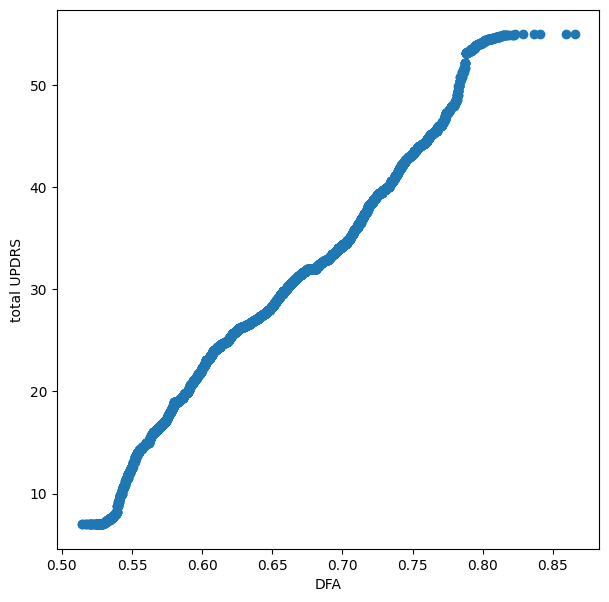

In [75]:
#Primero un un scatter plot para ver la relación con DFA

feature = X["DFA"] #Designamos como feature DFA, ya que tuvo el mejor coeficiente de correlación
target = y["total_UPDRS"]
feature = np.sort(feature)
target = np.sort(target)


fig = plt.figure(figsize=(7,7))
plt.scatter(feature, target)
plt.xlabel("DFA")
plt.ylabel("total UPDRS")

print(f"Correlation: {np.corrcoef(feature, target)}")
print(target)

In [78]:
#Usamos un modelo de regresión lineal
#SGDRegressor es un modelo de regresión lineal que se basa en el descenso de gradiente, usado en el notebook anterior
model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

#Usamos np.array(feature).reshape(-1, 1) porque usando solo una variable necesitamos que tenga la forma correcta
y_pred = cross_val_predict(model, np.array(feature).reshape(-1, 1), target, cv=5)

#Para evaluar el resultado de la predicción con cv checamos el R2 y el MSE
print("R²:", r2_score(target, y_pred))
print("MSE:", mean_squared_error(target, y_pred))

R²: 0.9777708281577506
MSE: 2.54471941286348
